In [ ]:
from transformers import pipeline
import time

# Use a pipeline as a high-level helper
pipe = pipeline("question-answering", model="distilbert-base-cased-distilled-squad", device=0)


def time_wrapper(func):
    def inner_func(*args, **kwargs):
        s = time.time()
        res = func(*args, **kwargs)
        return time.time() - s
        # print('Time elapsed:', time.time() - s)

    return inner_func


@time_wrapper
def predict(**kwargs):
  print(pipe(**kwargs))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

In [ ]:
context = '''
Making pancakes is a delicious weekend breakfast tradition in many families.
To start, mix together dry ingredients like flour, baking powder, salt, and sugar in a large bowl.
Make a well in the center and pour in milk, eggs, vanilla and melted butter.
Whisk the wet and dry ingredients together until just combined.
The batter should be thick but pourable. Heat up a large nonstick pan or griddle over medium heat and melt some butter on it.
Pour batter onto the pan in circles to make pancakes.
Cook for 2-3 minutes until bubbles start to form on top, then flip over carefully with a spatula.
Cook another 2-3 minutes until golden brown. Repeat with remaining batter.
Serve pancakes warm with favorite toppings like maple syrup, fruit, whipped cream or chocolate chips.
Pancakes are best enjoyed fresh off the griddle!
People like pancake because its delicious!
'''

In [ ]:
questions = ['What are two dry ingredients used to make pancake batter?',
             'What liquid ingredients are mixed into the dry ingredients?',
             'What is whisked together in the pancake recipe?',
             'How long should you cook pancakes on the first side before flipping?',
             'What is one way you can tell pancakes are ready to be flipped?',
             'What are two ways people commonly top pancakes before eating them?',
             'When are pancakes best enjoyed?',
             'why people like pancake?'
]

In [ ]:
times = []
for i in range(len(questions)):
  times.append(predict(question=questions[i % len(questions)], context=context))

{'score': 0.992725670337677, 'start': 122, 'end': 159, 'answer': 'flour, baking powder, salt, and sugar'}
{'score': 0.9927058219909668, 'start': 122, 'end': 159, 'answer': 'flour, baking powder, salt, and sugar'}
{'score': 0.6996583342552185, 'start': 264, 'end': 287, 'answer': 'wet and dry ingredients'}
{'score': 0.530415415763855, 'start': 507, 'end': 518, 'answer': '2-3 minutes'}
{'score': 0.5026065111160278, 'start': 585, 'end': 594, 'answer': 'a spatula'}
{'score': 0.35006245970726013, 'start': 719, 'end': 771, 'answer': 'maple syrup, fruit, whipped cream or chocolate chips'}
{'score': 0.9527410864830017, 'start': 799, 'end': 820, 'answer': 'fresh off the griddle'}
{'score': 0.435163289308548, 'start': 854, 'end': 864, 'answer': 'delicious!'}


In [ ]:
context = '''
Software engineering involves designing, developing, testing and deploying computer software applications.
Key responsibilities include gathering requirements from stakeholders, defining architectures, coding new functionality, fixing defects, improving performance, maintaining documentation, and collaborating with teammates using agile methodologies.
Technical skills like specific programming languages, debugging, algorithms and data structures are required.
Soft skills such as communication, time management and teamwork are equally crucial.
Development tools include IDEs like Visual Studio, version control systems like Git, continuous integration/delivery pipelines, issue trackers, and code repositories.
Engineers write well-documented, maintainable code following style guidelines.
They use practices like code reviews and unit testing to validate quality.
The field requires continuously learning new technologies and skills as it evolves rapidly.
Successful software engineers are analytical, detail-oriented problem solvers who thrive on building complex systems collaboratively.
'''

In [ ]:
questions = ['What are two main activities in software engineering?',
             'What is one interpersonal skill important for engineers?',
             'What is one category of software development tools?',
             'What is reviewed to validate code quality?',
             'What practice helps ensure code is maintainable in the future?',
             'What methodology do engineers use to build applications as a team?',
             'What must software engineers continuously learn due to frequent changes?',
             'What are two key traits of effective software engineers?'
]

In [ ]:
times = []
for i in range(len(questions)):
  times.append(predict(question=questions[i % len(questions)], context=context))

{'score': 0.6955738067626953, 'start': 31, 'end': 106, 'answer': 'designing, developing, testing and deploying computer software applications'}
{'score': 0.4308426082134247, 'start': 727, 'end': 794, 'answer': 'write well-documented, maintainable code following style guidelines'}
{'score': 0.10127884894609451, 'start': 576, 'end': 599, 'answer': 'IDEs like Visual Studio'}
{'score': 0.9660289287567139, 'start': 837, 'end': 849, 'answer': 'unit testing'}
{'score': 0.5224269032478333, 'start': 778, 'end': 794, 'answer': 'style guidelines'}
{'score': 0.5559930205345154, 'start': 334, 'end': 353, 'answer': 'agile methodologies'}
{'score': 0.9316478967666626, 'start': 912, 'end': 939, 'answer': 'new technologies and skills'}
{'score': 0.18687812983989716, 'start': 997, 'end': 1040, 'answer': 'analytical, detail-oriented problem solvers'}


/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1123: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


In [ ]:
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel

# Load pre-trained model tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

# Load pre-trained model
model = GPT2LMHeadModel.from_pretrained('gpt2')

# Set model to eval mode
model.eval()

# Encode context to input ids
context = "In the morning, I drink a cup of coffee to start my day. Next, I"
input_ids = tokenizer.encode(context, return_tensors='pt')

# Generate text
generated = model.generate(input_ids, max_length=100, do_sample=True)

# Decode generated text
text = tokenizer.decode(generated[0], skip_special_tokens=True)
print()
print(text)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



In the morning, I drink a cup of coffee to start my day. Next, I talk to Mr., B. and talk with Mr., A. about the business. These are just the people. It's fun, I really think. I think when I start writing I feel like these people could be great. But when it comes to getting things done, I think I always get an unfair advantage from writing in these sort of quiet places.

One day I was working with one of


In [12]:
from transformers import pipeline
import matplotlib.pyplot as plt
import urllib
import numpy as np
from PIL import Image
import torch

In [24]:
# @title Model Selection  { display-mode: "form" }
model = "microsoft/git-base" #@param ["Salesforce/blip2-opt-2.7b", "microsoft/git-base"]

model_pipe = pipeline("image-to-text", model=model)

The model 'GitForCausalLM' is not supported for image-to-text. Supported models are ['VisionEncoderDecoderModel'].


In [31]:
# @title Prediction  { display-mode: "form" }
image_path = 'https://m.media-amazon.com/images/I/71cXwgCUrYL.jpg' #@param {type:"string"}

if image_path.startswith('http'):
  img = np.array(Image.open(urllib.request.urlopen(image_path)))
else:
  img = plt.imread(image_path)

caption = model_pipe(image_path)[0]['generated_text']
#caption = 'a kitten playing with a toy'
print('Caption:', caption)

plt.axis('off')
plt.imshow(img)

TypeError: 'NoneType' object is not callable

In [27]:
pip install salesforce-lavis

In [ ]:
import lavis
from lavis.models import load_model_and_preprocess
from lavis.processors import load_processor
from lavis.common.gradcam import getAttMap
from lavis.models.blip_models.blip_image_text_matching import compute_gradcam

In [ ]:
# @title Setup Gradcam model {display-mode: "form"}
device = torch.device("cuda") if torch.cuda.is_available() else "cpu"
model, vis_processors, text_processors = load_model_and_preprocess("blip_image_text_matching", "base", device=device, is_eval=True)

In [30]:
# @title Compute Gradcam  { display-mode: "form" }
def visualize_attention(img, full_caption):
    raw_image = Image.fromarray(img).convert('RGB')

    dst_w = 720
    w, h = raw_image.size
    scaling_factor = dst_w / w

    resized_img = raw_image.resize((int(w * scaling_factor), int(h * scaling_factor)))
    norm_img = np.float32(resized_img) / 255

    img = vis_processors["eval"](raw_image).unsqueeze(0).to(device)
    txt = text_processors["eval"](full_caption)

    txt_tokens = model.tokenizer(txt, return_tensors="pt").to(device)
    gradcam, _ = compute_gradcam(model, img, txt, txt_tokens, block_num=7)
    gradcam[0] = gradcam[0].numpy().astype(np.float32)

    num_image = len(txt_tokens.input_ids[0]) - 2
    fig, ax = plt.subplots(num_image, 1, figsize=(15, 5 * num_image))

    gradcam_iter = iter(gradcam[0][2:-1])
    token_id_iter = iter(txt_tokens.input_ids[0][1:-1])

    # word = model.tokenizer.decode([0])
    # gradcam_image = getAttMap(norm_img, next(gradcam_iter), blur=True)

    # plt.subplot(1, 2, 1)
    # plt.axis('off')
    # plt.imshow(norm_img)

    # plt.subplot(1, 2, 2)
    # plt.axis('off')
    # plt.imshow(gradcam_image)

    # plt.title(full_caption)

    for i, (gradcam, token_id) in enumerate(zip(gradcam_iter, token_id_iter)):
        word = model.tokenizer.decode([token_id])
        gradcam_image = getAttMap(norm_img, gradcam, blur=True)
        gradcam_image = (gradcam_image * 255).astype(np.uint8)
        ax[i].imshow(gradcam_image)
        ax[i].set_yticks([])
        ax[i].set_xticks([])
        ax[i].set_xlabel(word)

visualize_attention(img, caption)

AttributeError: 'str' object has no attribute 'tokenizer'

In [2]:
pip install min-dalle

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 3.2 MB/s eta 0:00:00
  Created wheel for min-dalle: filename=min_dalle-0.4.11-py3-none-any.whl size=10518 sha256=4de7ddde9d48328d38e17d1c393e33a963de2639479cd3fcd2b6fc44330bf522
  Stored in directory: /root/.cache/pip/wheels/52/6d/e3/c4eae4ec07f23168d03ed0f58073be84cd4d0a4c990eec7dc2
Successfully built min-dalle


In [4]:
from min_dalle import MinDalle
import matplotlib.pyplot as plt
import numpy as np
import torch

# loading pre-trained model
model = MinDalle(
    models_root='./pretrained',
    dtype=torch.float32,
    device='cuda',
    is_mega=True,
    is_reusable=True
)

using device cuda
intializing TextTokenizer
initializing DalleBartEncoder
initializing DalleBartDecoder
initializing VQGanDetokenizer


In [2]:
# @title String fields
text_input = 'fireworks in the night' # @param {type:"string"}
# e.g. 'flying animals with blue sky and white clouds'

1 / 5  --- generated
2 / 5  --- generated
3 / 5  --- generated
4 / 5  --- generated
5 / 5  --- generated


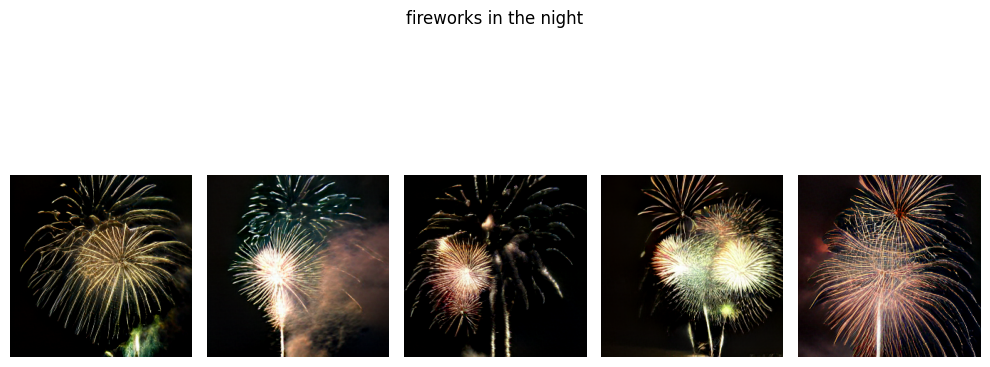

In [5]:
plt.figure(figsize=(10,5))
max_images = 5
for x in range(max_images):
  image = model.generate_image(
      text=text_input,
      seed=-1,
      grid_size=1
  )
  image = np.asarray(image)
  plt.subplot(1,5,x+1); plt.imshow(image); plt.axis('off')
  print(x+1,'/',max_images,' --- generated')
plt.suptitle(text_input)
plt.tight_layout()